# Lab | Random Forests

For this lab, you will be using the CSV files provided in the `files_for_lab` folder.

### Instructions

- Apply the Random Forests algorithm but this time only by upscaling the data.
- Discuss the output and its impact in the bussiness scenario. Is the cost of a false positive equals to the cost of the false negative? How would you change your algorithm or data in order to maximize the return of the bussiness?

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, cohen_kappa_score, recall_score
from sklearn.metrics import make_scorer



In [2]:
categorical = pd.read_csv('files_for_lab/categorical.csv')
numerical = pd.read_csv('files_for_lab/numerical.csv')
target = pd.read_csv('files_for_lab/target.csv')

In [3]:
categorical

STATE  CLUSTER HOMEOWNR GENDER  DATASRCE RFA_2R RFA_2A GEOCODE2  \
0         IL       36        H      F         3      L      E        C   
1         CA       14        H      M         3      L      G        A   
2         NC       43        U      M         3      L      E        C   
3         CA       44        U      F         3      L      E        C   
4         FL       16        H      F         3      L      F        A   
...      ...      ...      ...    ...       ...    ...    ...      ...   
95407  other       27        H      M         3      L      G        C   
95408     TX       24        H      M         3      L      F        A   
95409     MI       30        H      M         3      L      E        B   
95410     CA       24        H      F         2      L      F        A   
95411     NC       24        U      F         3      L      G        C   

      DOMAIN_A  DOMAIN_B  ODATEW_YR  ODATEW_MM  DOB_YR  DOB_MM  MINRDATE_YR  \
0            T         2         89          1      37      12           92   
1            S         1         94          1      52       2           93   
2            R         2         90          1       0       2           91   
3            R         2         87          1      28       1           87   
4            S         2         86          1      20       1           93   
...        ...       ...        ...        ...     ...     ...          ...   
95407        C         2         96          1       0       2           96   
95408        C         1         96          1      50       1           96   
95409        C         3         95          1      38       1           96   
95410        C         1         86          1      40       5           90   
95411        C         1         88          1      18       1           88   

       MINRDATE_MM  MAXRDATE_YR  MAXRDATE_MM  LASTDATE_YR  LASTDATE_MM  \
0                8           94            2           95           12   
1               10           95           12           95           12   
2               11           92            7           95           12   
3               11           94           11           95           12   
4               10           96            1           96            1   
...            ...          ...          ...          ...          ...   
95407            2           96            2           96            2   
95408            3           96            3           96            3   
95409            3           95            1           96           10   
95410           11           96            8           97            1   
95411           12           93           12           96           12   

       FIRSTDATE_YR  FIRSTDATE_MM  
0                89            11  
1                93            10  
2                90             1  
3                87             2  
4                79             3  
...             ...           ...  
95407            96             2  
95408            96             3  
95409            94            10  
95410            86            12  
95411            88             3  

[95412 rows x 22 columns]

In [4]:
numerical

TCODE        AGE  INCOME  WEALTH1  HIT  MALEMILI  MALEVET  VIETVETS  \
0          0  60.000000       5        9    0         0       39        34   
1          1  46.000000       6        9   16         0       15        55   
2          1  61.611649       3        1    2         0       20        29   
3          0  70.000000       1        4    2         0       23        14   
4          0  78.000000       3        2   60         1       28         9   
...      ...        ...     ...      ...  ...       ...      ...       ...   
95407      1  61.611649       5        9    0        14       36        47   
95408      1  48.000000       7        9    1         0       31        43   
95409      1  60.000000       5        9    0         0       18        46   
95410      0  58.000000       7        9    0         0       28        35   
95411      2  80.000000       5        8    3         1       33        22   

       WWIIVETS  LOCALGOV  STATEGOV  FEDGOV  WEALTH2  POP901  POP902  POP903  \
0            18        10         2       1        5     992     264     332   
1            11         6         2       1        9    3611     940     998   
2            33         6         8       1        1    7001    2040    2669   
3            31         3         0       3        0     640     160     219   
4            53        26         3       2        9    2520     627     761   
...         ...       ...       ...     ...      ...     ...     ...     ...   
95407        11         7         8      13        9   27380    7252   10037   
95408        19         4         1       0        9    1254     322     361   
95409        20         7        23       0        9     552     131     205   
95410        20         9         1       1        7    1746     432     508   
95411        27         8        10       3        8    3935    1192    1342   

       POP90C1  POP90C2  POP90C3  POP90C4  POP90C5  ETH1  ETH2  ETH3  ETH4  \
0            0       35       65       47       53    92     1     0     0   
1           99        0        0       50       50    67     0     0    31   
2            0        2       98       49       51    96     2     0     0   
3            0        8       92       54       46    61     0     0    11   
4           99        0        0       46       54     2    98     0     0   
...        ...      ...      ...      ...      ...   ...   ...   ...   ...   
95407       99        0        0       50       50    78    10     6     4   
95408       96        0        4       51       49    91     3     0     2   
95409       99        0        0       53       47    82    14     0     1   
95410       99        0        0       47       53    92     1     1     5   
95411       99        0        0       48       52    86    12     0     1   

       ETH5  ETH6  ETH7  ETH8  ETH9  ETH10  ETH11  ETH12  ETH13  ETH14  ETH15  \
0        11     0     0     0     0      0      0      0     11      0      0   
1         6     4     2     6     4     14      0      0      2      0      1   
2         2     0     0     0     0      0      0      0      2      0      0   
3        32     6     2     0     0      0      0      0     31      0      0   
4         1     0     0     0     0      0      0      0      0      0      0   
...     ...   ...   ...   ...   ...    ...    ...    ...    ...    ...    ...   
95407     5     0     0     0     1      1      0      0      3      1      0   
95408     6     1     0     1     0      0      0      0      5      0      0   
95409     9     0     0     0     0      0      0      0      9      0      0   
95410     8     0     1     2     0      1      0      0      5      0      0   
95411     1     0     0     0     0      0      0      0      0      0      0   

       ETH16  AGE901  AGE902  AGE903  AGE904  AGE905  AGE906  AGE907  CHIL1  \
0          0      39      48      51      40      50      54      25     31   
1          4      34      41      43     

In [5]:
target

TARGET_B  TARGET_D
0             0       0.0
1             0       0.0
2             0       0.0
3             0       0.0
4             0       0.0
...         ...       ...
95407         0       0.0
95408         0       0.0
95409         0       0.0
95410         1      18.0
95411         0       0.0

[95412 rows x 2 columns]

#### Categorical

In [6]:
categorical.isna().sum()

STATE           0
CLUSTER         0
HOMEOWNR        0
GENDER          0
DATASRCE        0
RFA_2R          0
RFA_2A          0
GEOCODE2        0
DOMAIN_A        0
DOMAIN_B        0
ODATEW_YR       0
ODATEW_MM       0
DOB_YR          0
DOB_MM          0
MINRDATE_YR     0
MINRDATE_MM     0
MAXRDATE_YR     0
MAXRDATE_MM     0
LASTDATE_YR     0
LASTDATE_MM     0
FIRSTDATE_YR    0
FIRSTDATE_MM    0
dtype: int64

#### encode categorical data

In [7]:
encoded_categorical = pd.get_dummies(categorical, drop_first = True)
encoded_categorical

CLUSTER  DATASRCE  DOMAIN_B  ODATEW_YR  ODATEW_MM  DOB_YR  DOB_MM  \
0           36         3         2         89          1      37      12   
1           14         3         1         94          1      52       2   
2           43         3         2         90          1       0       2   
3           44         3         2         87          1      28       1   
4           16         3         2         86          1      20       1   
...        ...       ...       ...        ...        ...     ...     ...   
95407       27         3         2         96          1       0       2   
95408       24         3         1         96          1      50       1   
95409       30         3         3         95          1      38       1   
95410       24         2         1         86          1      40       5   
95411       24         3         1         88          1      18       1   

       MINRDATE_YR  MINRDATE_MM  MAXRDATE_YR  MAXRDATE_MM  LASTDATE_YR  \
0               92            8           94            2           95   
1               93           10           95           12           95   
2               91           11           92            7           95   
3               87           11           94           11           95   
4               93           10           96            1           96   
...            ...          ...          ...          ...          ...   
95407           96            2           96            2           96   
95408           96            3           96            3           96   
95409           96            3           95            1           96   
95410           90           11           96            8           97   
95411           88           12           93           12           96   

       LASTDATE_MM  FIRSTDATE_YR  FIRSTDATE_MM  STATE_FL  STATE_GA  STATE_IL  \
0               12            89            11         0         0         1   
1               12            93            10         0         0         0   
2               12            90             1         0         0         0   
3               12            87             2         0         0         0   
4                1            79             3         1         0         0   
...            ...           ...           ...       ...       ...       ...   
95407            2            96             2         0         0         0   
95408            3            96             3         0         0         0   
95409           10            94            10         0         0         0   
95410            1            86            12         0         0         0   
95411           12            88             3         0         0         0   

       STATE_IN  STATE_MI  STATE_MO  STATE_NC  STATE_TX  STATE_WA  STATE_WI  \
0             0         0         0         0         0         0         0   
1             0         0         0         0         0         0         0   
2             0         0         0         1         0         0         0   
3             0         0         0         0         0         0         0   
4             0         0         0         0         0         0         0   
...         ...       ...       ...       ...       ...       ...       ...   
95407         0         0         0         0         0         0         0   
95408         0         0         0         0         1         0         0   
95409         0         1         0         0         0         0         0   
95410         0         0         0         0         0         0         0   
95411         0         0         0         1         0         0         0   

       STATE_other  HOMEOWNR_U  GENDER_M  GENDER_other  RFA_2A_E  RFA_2A_F  \
0                0           0         0             0         1         0   
1                0           0         1             0         0         0   
2                0           1         1             0       

#### concatenate datasets

In [8]:
data = pd.concat([numerical, encoded_categorical, target], axis=1)
data

TCODE        AGE  INCOME  WEALTH1  HIT  MALEMILI  MALEVET  VIETVETS  \
0          0  60.000000       5        9    0         0       39        34   
1          1  46.000000       6        9   16         0       15        55   
2          1  61.611649       3        1    2         0       20        29   
3          0  70.000000       1        4    2         0       23        14   
4          0  78.000000       3        2   60         1       28         9   
...      ...        ...     ...      ...  ...       ...      ...       ...   
95407      1  61.611649       5        9    0        14       36        47   
95408      1  48.000000       7        9    1         0       31        43   
95409      1  60.000000       5        9    0         0       18        46   
95410      0  58.000000       7        9    0         0       28        35   
95411      2  80.000000       5        8    3         1       33        22   

       WWIIVETS  LOCALGOV  STATEGOV  FEDGOV  WEALTH2  POP901  POP902  POP903  \
0            18        10         2       1        5     992     264     332   
1            11         6         2       1        9    3611     940     998   
2            33         6         8       1        1    7001    2040    2669   
3            31         3         0       3        0     640     160     219   
4            53        26         3       2        9    2520     627     761   
...         ...       ...       ...     ...      ...     ...     ...     ...   
95407        11         7         8      13        9   27380    7252   10037   
95408        19         4         1       0        9    1254     322     361   
95409        20         7        23       0        9     552     131     205   
95410        20         9         1       1        7    1746     432     508   
95411        27         8        10       3        8    3935    1192    1342   

       POP90C1  POP90C2  POP90C3  POP90C4  POP90C5  ETH1  ETH2  ETH3  ETH4  \
0            0       35       65       47       53    92     1     0     0   
1           99        0        0       50       50    67     0     0    31   
2            0        2       98       49       51    96     2     0     0   
3            0        8       92       54       46    61     0     0    11   
4           99        0        0       46       54     2    98     0     0   
...        ...      ...      ...      ...      ...   ...   ...   ...   ...   
95407       99        0        0       50       50    78    10     6     4   
95408       96        0        4       51       49    91     3     0     2   
95409       99        0        0       53       47    82    14     0     1   
95410       99        0        0       47       53    92     1     1     5   
95411       99        0        0       48       52    86    12     0     1   

       ETH5  ETH6  ETH7  ETH8  ETH9  ETH10  ETH11  ETH12  ETH13  ETH14  ETH15  \
0        11     0     0     0     0      0      0      0     11      0      0   
1         6     4     2     6     4     14      0      0      2      0      1   
2         2     0     0     0     0      0      0      0      2      0      0   
3        32     6     2     0     0      0      0      0     31      0      0   
4         1     0     0     0     0      0      0      0      0      0      0   
...     ...   ...   ...   ...   ...    ...    ...    ...    ...    ...    ...   
95407     5     0     0     0     1      1      0      0      3      1      0   
95408     6     1     0     1     0      0      0      0      5      0      0   
95409     9     0     0     0     0      0      0      0      9      0      0   
95410     8     0     1     2     0      1      0      0      5      0      0   
95411     1     0     0     0     0      0      0      0      0      0      0   

       ETH16  AGE901  AGE902  AGE903  AGE904  AGE905  AGE906  AGE907  CHIL1  \
0          0      39      48      51      40      50      54      25     31   
1          4      34      41      43     

#### x/y split

In [9]:
y = data['TARGET_B']
X = data.drop(['TARGET_B','TARGET_D'], axis = 1)

#### train/test split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

X_train.columns = X.columns
X_test.columns = X.columns

#### scale train set

In [11]:
transformer = MinMaxScaler()
transformer.fit(X_train)

X_train_standardized = transformer.transform(X_train)
X_test_standardized = transformer.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_standardized, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_standardized, columns=X_test.columns)


#### fixing imbalance TARGET_B

In [12]:
ros = RandomOverSampler(random_state=0)
X_train_res, y_train_res = ros.fit_resample(X_train_scaled,y_train)
X_test_res, y_test_res = ros.fit_resample(X_test_scaled,y_test)

In [13]:
X_train_res

TCODE       AGE    INCOME   WEALTH1       HIT  MALEMILI   MALEVET  \
0       0.000017  0.762887  0.500000  0.666667  0.008299  0.000000  0.313131   
1       0.000000  0.536082  0.666667  1.000000  0.000000  0.000000  0.292929   
2       0.000017  0.608247  0.666667  0.111111  0.020747  0.000000  0.424242   
3       0.000017  0.783505  0.833333  0.666667  0.037344  0.010101  0.404040   
4       0.000052  0.556701  0.666667  0.222222  0.087137  0.333333  0.272727   
...          ...       ...       ...       ...       ...       ...       ...   
144967  0.000000  0.453608  0.166667  0.111111  0.008299  0.000000  0.303030   
144968  0.000000  0.624862  0.666667  1.000000  0.000000  0.000000  0.000000   
144969  0.000000  0.701031  0.000000  0.111111  0.049793  0.000000  0.131313   
144970  0.000000  0.319588  0.666667  0.888889  0.004149  0.000000  0.383838   
144971  0.000034  0.680412  0.833333  1.000000  0.037344  0.000000  0.252525   

        VIETVETS  WWIIVETS  LOCALGOV  STATEGOV    FEDGOV   WEALTH2    POP901  \
0       0.101010  0.686869  0.060606  0.121212  0.034483  1.000000  0.007153   
1       0.242424  0.383838  0.070707  0.080808  0.045977  1.000000  0.045856   
2       0.161616  0.626263  0.101010  0.020202  0.011494  0.111111  0.067304   
3       0.232323  0.414141  0.080808  0.030303  0.045977  0.666667  0.014063   
4       0.292929  0.181818  0.121212  0.020202  0.080460  1.000000  0.010040   
...          ...       ...       ...       ...       ...       ...       ...   
144967  0.262626  0.212121  0.060606  0.080808  0.045977  1.000000  0.032158   
144968  0.000000  0.000000  0.000000  0.000000  0.000000  1.000000  0.241760   
144969  0.000000  0.646465  0.080808  0.000000  0.022989  0.888889  0.018703   
144970  0.393939  0.393939  0.040404  0.030303  0.000000  1.000000  0.014225   
144971  0.353535  0.353535  0.060606  0.040404  0.000000  1.000000  0.021682   

          POP902    POP903   POP90C1  POP90C2   POP90C3   POP90C4   POP90C5  \
0       0.009129  0.007683  1.000000      0.0  0.000000  0.474747  0.535354   
1       0.055403  0.044968  0.000000      0.0  1.000000  0.494949  0.515152   
2       0.091154  0.087309  1.000000      0.0  0.000000  0.454545  0.555556   
3       0.017853  0.013728  1.000000      0.0  0.000000  0.494949  0.515152   
4       0.012052  0.010988  0.939394      0.0  0.070707  0.505051  0.505051   
...          ...       ...       ...      ...       ...       ...       ...   
144967  0.035212  0.038245  1.000000      0.0  0.000000  0.474747  0.535354   
144968  0.274947  0.221874  1.000000      0.0  0.000000  0.494949  0.515152   
144969  0.018258  0.021467  1.000000      0.0  0.000000  0.535354  0.474747   
144970  0.017448  0.014434  0.000000      1.0  0.000000  0.474747  0.535354   
144971  0.029006  0.023134  1.000000      0.0  0.000000  0.505051  0.505051   

            ETH1      ETH2      ETH3      ETH4      ETH5      ETH6      ETH7  \
0       0.757576  0.212121  0.000000  0.020202  0.020202  0.000000  0.000000   
1       0.757576  0.161616  0.090909  0.000000  0.010101  0.000000  0.000000   
2       0.989899  0.000000  0.000000  0.010101  0.020202  0.000000  0.000000   
3       0.787879  0.010101  0.010101  0.151515  0.111111  0.000000  0.013889   
4       0.888889  0.080808  0.000000  0.030303  0.040404  0.000000  0.000000   
...          ...       ...       ...       ...       ...       ...       ...   
144967  0.787879  0.121212  0.010101  0.080808  0.030303  0.000000  0.000000   
144968  0.858586  0.020202  0.010101  0.070707  0.191919  0.045455  0.013889   
144969  0.606061  0.343434  0.000000  0.010101  0.161616  0.000000  0.000000   
144970  0.919192  0.010101  0.050505  0.020202  0.010101  0.000000  0.000000   
144971  0.868687  0.010101  0.000000  0.111111  0.060606  0.045455  0.013889   

            ETH8      ETH9     ETH10     ETH11     ETH12     ETH13     ETH14  \
0       0.000000  0.000000  0.000000  0.021277  0.000000  0.000000  0.017544   
1       0.000000  0

In [14]:
y_train_res.value_counts()

0    72486
1    72486
Name: TARGET_B, dtype: int64

#### select the best features

In [15]:
kbest = SelectKBest(chi2, k=10) # Here we choose 10 best features so that is easier to analyze results later
kbest.fit(X_train_res, y_train_res)
X_new = kbest.transform(X_train_res)

In [16]:
best_cols = [X.columns[index] for index,value in enumerate(kbest.get_support().tolist()) if value == True]
print(best_cols)

['ETH2', 'HVP1', 'HVP2', 'HVP3', 'CARDGIFT', 'RFA_2F', 'LASTDATE_YR', 'RFA_2A_E', 'RFA_2A_F', 'RFA_2A_G']


#### Grid Search

In [17]:
max_depth_choices = [3,10,None] # A list of the possible values of max_depth to try
criterion_choices = ["gini", "entropy"] # A list of the possible values optimization metrics
min_samples_split_choices = [2,10] # A list of the possible values of min_samples_split to try
min_samples_leaf_choices = [2,10] # A list of the possible values of min_samples_leaf to try       

In [18]:
grid = {'max_depth': max_depth_choices,
        'criterion': criterion_choices,
        'min_samples_split': min_samples_split_choices,
        'min_samples_leaf': min_samples_leaf_choices}

In [19]:
model = RandomForestClassifier()
# param_grid -> state the dictionary of parameters to optimize
# cv = 5 -> number of cross validation folds <------ CV is REALLY important in grid search. Why?
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 5, verbose = 3)

In [20]:
#grid_search.fit(X_train_res[best_cols], y_train_res)

In [21]:
#grid_search.best_params_

### Best Parameter: 
{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [22]:
model = RandomForestClassifier(criterion ='entropy', max_depth = None, min_samples_leaf = 2, min_samples_split = 2)

model.fit(X_train_res[best_cols], y_train_res)

print("The Accuracy for the Random Forest in the TRAIN set is {:.2f}".format(model.score(X_train_res[best_cols], y_train_res)))
print("The Accuracy for the Random Forest in the TEST  set is {:.2f}".format(model.score(X_test[best_cols], y_test)))

y_test_pred = model.predict(X_test_res[best_cols])
y_train_pred = model.predict(X_train_res[best_cols])




The Accuracy for the Random Forest in the TRAIN set is 0.98
The Accuracy for the Random Forest in the TEST  set is 0.91


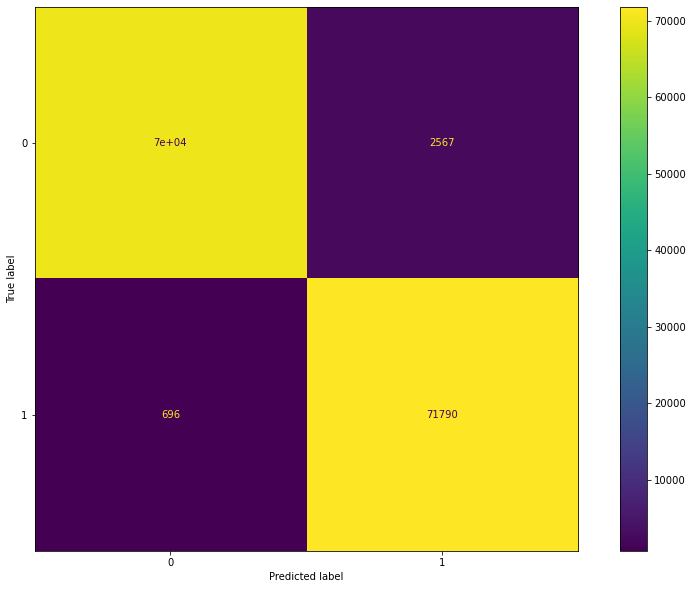

In [23]:

cm_train = confusion_matrix(y_train_res, y_train_pred)
fig, ax = plt.subplots(figsize = (15,10))
ConfusionMatrixDisplay(cm_train, display_labels=model.classes_).plot(ax=ax)
plt.show()

In [24]:
pd.Series(y_test_pred).value_counts()

0    34315
1     1851
dtype: int64

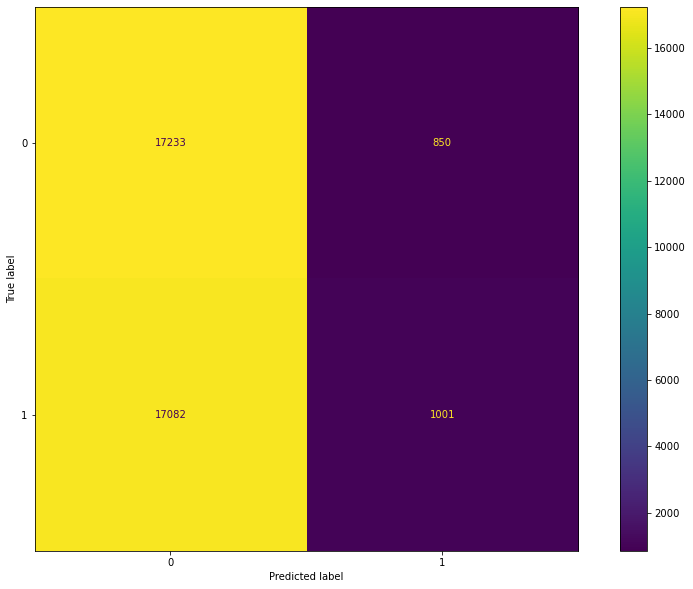

In [25]:
cm_test = confusion_matrix(y_test_res, y_test_pred)
fig, ax = plt.subplots(figsize = (15,10))
ConfusionMatrixDisplay(cm_test, display_labels=model.classes_).plot(ax=ax)
plt.show()

#### cross_val-score

In [26]:
results = cross_val_score(model, X_train_res[best_cols], y_train_res, cv=5)
print(f"Average accuracy: {results.mean()}")

Average accuracy: 0.9665383647350767


In [27]:
results = cross_val_score(model, X_test_res[best_cols], y_test_res, cv=5)
print(f"Average accuracy: {results.mean()}")

Average accuracy: 0.9797322817833249


#### make_scorer

In [28]:
scorer = make_scorer(cohen_kappa_score)
params = {
  'criterion': ['entropy'],
  'min_samples_split': [2],
  'min_samples_leaf': [2],
}
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=params, cv=5, scoring=scorer, verbose=3)
grid_search.fit(X_train_res[best_cols], y_train_res)

grid_search.best_score_
 


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END criterion=entropy, min_samples_leaf=2, min_samples_split=2;, score=0.934 total time=   7.2s
[CV 2/5] END criterion=entropy, min_samples_leaf=2, min_samples_split=2;, score=0.935 total time=   7.2s
[CV 3/5] END criterion=entropy, min_samples_leaf=2, min_samples_split=2;, score=0.935 total time=   7.2s
[CV 4/5] END criterion=entropy, min_samples_leaf=2, min_samples_split=2;, score=0.935 total time=   7.3s
[CV 5/5] END criterion=entropy, min_samples_leaf=2, min_samples_split=2;, score=0.933 total time=   7.3s


0.9344149182866414

In [29]:
scorer = make_scorer(f1_score)
params = {
  'criterion': ['entropy'],
  'min_samples_split': [2],
  'min_samples_leaf': [2],
}
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=params, cv=5, scoring=scorer, verbose=3)
grid_search.fit(X_train_res[best_cols], y_train_res)

grid_search.best_score_

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END criterion=entropy, min_samples_leaf=2, min_samples_split=2;, score=0.967 total time=   7.2s
[CV 2/5] END criterion=entropy, min_samples_leaf=2, min_samples_split=2;, score=0.968 total time=   7.2s
[CV 3/5] END criterion=entropy, min_samples_leaf=2, min_samples_split=2;, score=0.968 total time=   7.2s
[CV 4/5] END criterion=entropy, min_samples_leaf=2, min_samples_split=2;, score=0.967 total time=   7.3s
[CV 5/5] END criterion=entropy, min_samples_leaf=2, min_samples_split=2;, score=0.967 total time=   7.2s


0.9674193506064096

In [30]:
scorer = make_scorer(recall_score)
params = {
  'criterion': ['entropy'],
  'min_samples_split': [2],
  'min_samples_leaf': [2],
}
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=params, cv=5, scoring=scorer, verbose=3)
grid_search.fit(X_train_res[best_cols], y_train_res)

grid_search.best_score_

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END criterion=entropy, min_samples_leaf=2, min_samples_split=2;, score=0.988 total time=   7.3s
[CV 2/5] END criterion=entropy, min_samples_leaf=2, min_samples_split=2;, score=0.989 total time=   7.3s
[CV 3/5] END criterion=entropy, min_samples_leaf=2, min_samples_split=2;, score=0.990 total time=   7.3s
[CV 4/5] END criterion=entropy, min_samples_leaf=2, min_samples_split=2;, score=0.987 total time=   7.2s
[CV 5/5] END criterion=entropy, min_samples_leaf=2, min_samples_split=2;, score=0.988 total time=   7.3s


0.9885770973036477

The organisation does not lose directly income with false positives. is actually people who does not donate anyway.
It would be worse to predict more false negatives, since the organisation would be missing out on potential donations.